In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("../data/yellow_tripdata_2020-04.csv")
#df = pd.read_csv("../data/yellow_tripdata_2020-04.csv", nrows=100)

df.describe()

/var/folders/wg/62v23f191zsbtpgk23vhgv2h0000gn/T/ipykernel_1141/2962326485.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/yellow_tripdata_2020-04.csv")


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,238072.000000,218492.000000,238072.000000,218492.000000,238072.000000,238072.000000,238072.000000,238072.000000,238072.000000,238072.000000,238072.000000,238072.000000,238072.000000,238072.000000,218492.000000,0.0
mean,1.592245,1.296752,4.040684,1.034079,154.940253,150.355897,1.308470,11.669171,1.067181,0.486983,1.529943,0.220859,0.296319,16.412025,2.023255,NaN
std,0.497112,0.983572,294.830143,0.865021,70.763223,74.476004,0.661205,11.731927,1.260590,0.095030,2.295457,1.343806,0.045462,13.160379,1.008089,NaN
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-118.000000,-4.500000,-0.500000,-5.000000,-19.870000,-0.300000,-138.170000,-2.500000,NaN
25%,1.000000,1.000000,0.950000,1.000000,97.000000,75.000000,1.000000,5.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,2.500000,NaN
50%,2.000000,1.000000,1.740000,1.000000,143.000000,143.000000,1.000000,8.000000,0.500000,0.500000,1.000000,0.000000,0.300000,12.800000,2.500000,NaN
75%,2.000000,1.000000,3.400000,1.000000,234.000000,233.000000,2.000000,13.000000,2.500000,0.500000,2.460000,0.000000,0.300000,18.360000,2.500000,NaN
max,6.000000,7.000000,126501.770000,99.000000,265.000000,265.000000,4.000000,903.020000,9.060000,1.100000,117.280000,98.750000,0.300000,903.320000,2.500000,NaN


In [105]:
df['tpep_pickup_datetime'].min()

'2020-02-02 21:48:34'

In [110]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
index_names = df[ df['tpep_pickup_month'] != "April" ].index
df.drop(index_names, inplace = True)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_month
0,1,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80,0.0,NaN,April
1,1,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1,12.50,0.5,0.5,2.75,0.00,0.3,16.55,0.0,NaN,April
2,1,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1,10.00,3.0,0.5,1.00,0.00,0.3,14.80,2.5,NaN,April
3,1,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1,10.00,3.0,0.5,1.00,0.00,0.3,14.80,2.5,NaN,April
4,2,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1,6.50,0.5,0.5,3.00,0.00,0.3,13.30,2.5,NaN,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238067,2,2020-04-30 23:30:00,2020-04-30 23:39:00,NaN,2.02,NaN,NaN,238,75,0,8.46,0.0,0.5,0.00,0.00,0.3,11.76,NaN,NaN,April
238068,2,2020-04-30 23:44:00,2020-04-30 23:54:00,NaN,3.30,NaN,NaN,263,230,0,13.46,0.0,0.5,0.00,0.00,0.3,16.76,NaN,NaN,April
238069,2,2020-04-30 23:25:00,2020-04-30 23:38:00,NaN,6.40,NaN,NaN,137,42,0,22.05,0.0,0.5,0.00,0.00,0.3,25.35,NaN,NaN,April
238070,2,2020-04-30 23:50:26,2020-05-01 00:28:21,NaN,25.70,NaN,NaN,29,69,0,68.16,0.0,0.5,0.00,6.12,0.3,77.58,NaN,NaN,April


In [120]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_pickup_day_numeric'] = df['tpep_pickup_datetime'].dt.day
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,tpep_pickup_month,tpep_pickup_day,tpep_dropoff_day,hours,duration,bins_total,bins_hours,bins_tip,tpep_pickup_day_numeric
0,1,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2,...,NaN,April,Wednesday,Wednesday,0.341944,0 days 00:20:31,10,0.5,NaN,1
1,1,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1,...,NaN,April,Wednesday,Wednesday,0.223611,0 days 00:13:25,20,0.5,5,1
2,1,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1,...,NaN,April,Wednesday,Wednesday,0.149722,0 days 00:08:59,20,0.5,1,1
3,1,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1,...,NaN,April,Wednesday,Wednesday,0.166667,0 days 00:10:00,20,0.5,1,1
4,2,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1,...,NaN,April,Wednesday,Wednesday,0.083889,0 days 00:05:02,20,0.1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238067,2,2020-04-30 23:30:00,2020-04-30 23:39:00,NaN,2.02,NaN,NaN,238,75,0,...,NaN,April,Thursday,Thursday,0.150000,0 days 00:09:00,20,0.5,NaN,30
238068,2,2020-04-30 23:44:00,2020-04-30 23:54:00,NaN,3.30,NaN,NaN,263,230,0,...,NaN,April,Thursday,Thursday,0.166667,0 days 00:10:00,20,0.5,NaN,30
238069,2,2020-04-30 23:25:00,2020-04-30 23:38:00,NaN,6.40,NaN,NaN,137,42,0,...,NaN,April,Thursday,Thursday,0.216667,0 days 00:13:00,30,0.5,NaN,30
238070,2,2020-04-30 23:50:26,2020-05-01 00:28:21,NaN,25.70,NaN,NaN,29,69,0,...,NaN,April,Thursday,Friday,0.631944,0 days 00:37:55,100,1.0,NaN,30


In [111]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['tpep_dropoff_day'] = df['tpep_dropoff_datetime'].dt.day_name()
df['hours'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'h')
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [112]:
# Create the labels for the bin
bin_labels_total = [ 10, 20, 30, 50, 100, 500]
bin_labels_hours = [0.05, 0.1, 0.5, 1, 5, 10]
bin_labels_tip = [ 1,2,5, 8,10]

# Create the dataframe object using the data_list
#df = pd.DataFrame.from_items(data_list)

# Define the scope of the bins
bins_total = [0, 10, 20, 30, 50, 100, 500]
bins_hours = [0, 0.05, 0.1, 0.5, 1, 5, 10]
bins_tip = [0, 1, 2, 5,8 ,10]

# Create the "bins" column using the cut function using the bins and labels
df['bins_total'] = pd.cut(df['total_amount'], bins=bins_total, labels=bin_labels_total)
df['bins_hours'] = pd.cut(df['hours'], bins=bins_hours, labels=bin_labels_hours)
df['bins_tip'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=bin_labels_tip)

<AxesSubplot:xlabel='fare_amount', ylabel='tip_amount'>

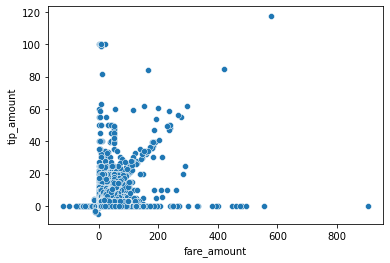

In [114]:
# tip/total
sns.scatterplot(data=df, x="fare_amount", y="tip_amount")

In [ ]:
# tip/total + Day


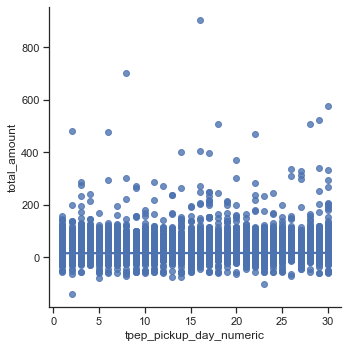

In [121]:
sns.lmplot(data=df, x="tpep_pickup_day_numeric", y="total_amount")

In [ ]:
# DOLocationID/PULocationID + duration or time

<AxesSubplot:xlabel='PULocationID', ylabel='tip_amount'>

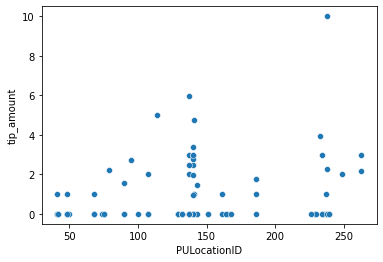

In [6]:
# tip/Location
sns.scatterplot(data=df, x="PULocationID", y="tip_amount")

In [37]:
# tip/day
sns.relplot(x="tpep_pickup_day", y="total_amount", size="tip_amount",
            alpha=.5,
            palette="muted",
            height=100,
            data=df)
#df.head()

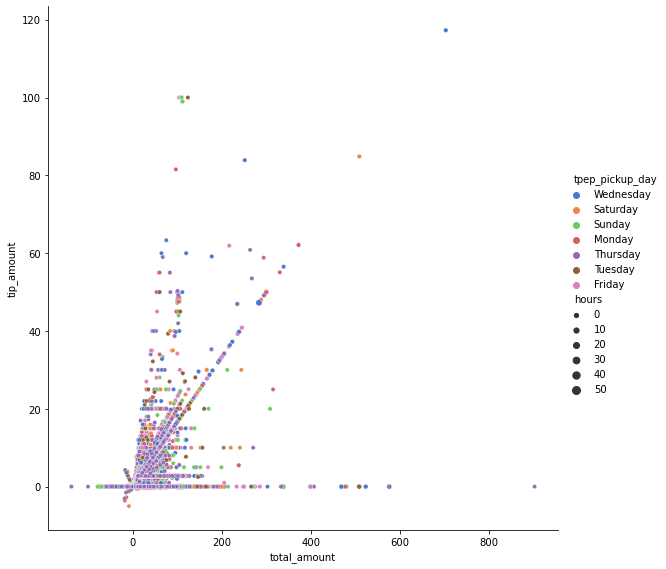

In [45]:
sns.relplot(x="total_amount", y="tip_amount", size="hours", hue="tpep_pickup_day",
            alpha=0.99,
            palette="muted",
            height=8,
            data=df)

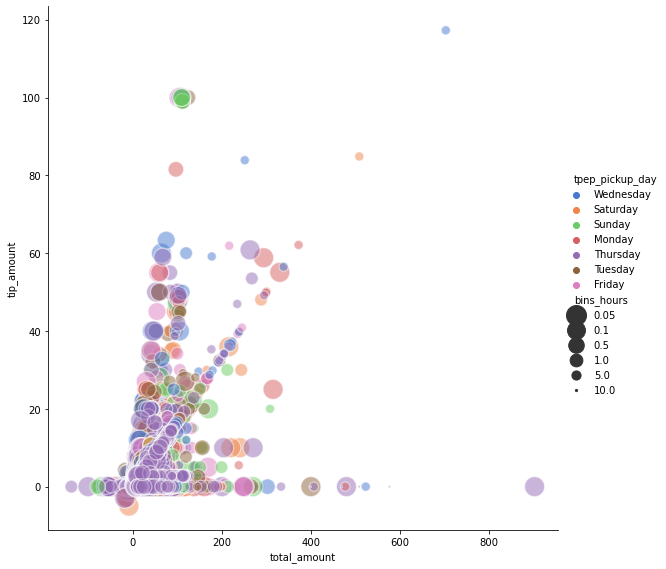

In [68]:

sns.relplot(x="total_amount", y="tip_amount", size="bins_hours", hue="tpep_pickup_day",  sizes=(5,400),          alpha=0.5,  palette="muted",height=8,data=df)

/Users/kenoc1/.conda/envs/taxi2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kenoc1/.conda/envs/taxi2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: autodetected range of [-inf, 1.7750883499320513] is not finite

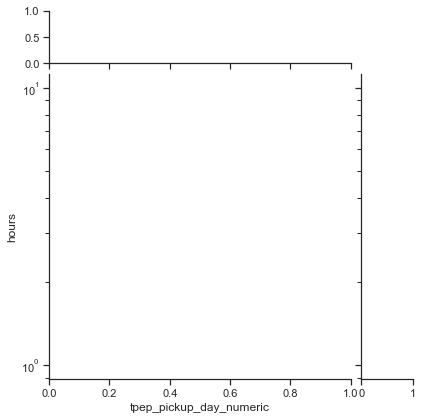

In [124]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
g = sns.JointGrid(data=df, x="tpep_pickup_day_numeric", y="hours", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
#cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")